# Modellering av reaksjonsfart i kjemiske reaksjoner

## Bakgrunn

Når vi beskriver kjemiske reaksjoner med tall åpner det seg en ny verden. Plutselig kan vi sammenligne kjemiske reaksjoner og forutsi hva som skjer når vi blander sammen reagenser. 

Å sette tall på hva som skjer i en kjemisk reaksjon brukes hver dag for å optimalisere prosesser både i forskningslaboratoriet og i industrien. Det er lett å tenke seg at kjemiske prosesser skal skje kontrollert og gi gode utbytter. En ting er å forstå en enkel reaksjon med få reaktanter og produkter. Men hvordan skal du angripe problemer der det er mange reaktanter, intermediater og produkter involvert, og hvor flere serielle og parallelle reaksjoner skjer samtidig? Da kan vi få god hjelp av modellering.

Et viktig utrykk i kjemien er likevekten mellom de forskjellige stoffene som er involvert i reaksjonen. For den enkle reaksjonen 

$$ A \rightleftharpoons B $$

er likevekten beskrevet som:

$$K=  \frac{[B]}{[A]} $$

Både A og B er løselige i vann. Pilene i det første utrykket forteller oss noe om hvilken retning reaksjonen går. I dette tilfellet, der vi har en reversibel likevekt, går reaksjonen i begge retninger. Når vi kjenner likevektkonstanten K kan vi for eksempel forutsi hvor mye A og B det finnes i løsningen vår når vi løser en bestemt mengde A i vann. Men, vi vet ingenting om når A og B vil være i likevekt. Det kan ta millisekunder eller tusenvis av år. For å bruke kjemi til noe fornuftig må vi altså vite noe om hvor fort reaksjoner går. Dette omtales ofte som kinetikken til reaksjoner.

Det var Guldberg og Waage som for over 100 år siden presenterte massevirkningsloven. Den moderne versjonen brukes for å beskrive hva som skjer med kjemiske reaksjoner over tid.
Vi starter med et enkelt eksempel:

$$A \xrightarrow{k} B$$ 

Merk at dette er ikke en likevekt (pilen peker en retning) men en irreversibel reaksjon. Bokstaven k er hastighetskonstanten til reaksjonen. I Kjemi I læreboken defineres:

$$ \text{reaksjonsfart} =  \frac{\text{endring av stoffmengdekonsentrasjon}}{\text{tid}} $$

Dette kan forkortes til

$$ r=  \frac{d[A]}{dt} $$

der r er reaksjonshastigheten og [A] er stoffmengdekonsentrasjon. Hastigheten av reaksjonen avhenger av stoffmengdekonsentrasjonen(e) til utgangsstoffet (utgangsstoffene) og er gitt ved differensialligningen:

$$ r=  \frac{d[A]}{dt} = -k[A] = k[B] $$

Ofte brukes det fiks ferdig integrerte hastighetslover når man analyserer enkle reaksjoner. I dette tilfellet er den integrerte loven:

$$ [A]=[A]_0 \cdot e^{-kt} $$

I dette kurset skal dere bruke numerisk løsning av differensialligninger til å visualisere hvordan konsentrasjonene av de forskjellige stoffmengdene endrer seg over tid gjennom en kjemisk reaksjon. Dette er en generell tilnærming som er veldig kraftfull spesielt i tilfeller der det foregår flere reaksjoner samtidig.


### Programmering

Vi skal nå lage et program som viser dette for et enkelt tilfelle. Starter med å definere en del variabler.

In [1]:
from pylab import *

N = 100              # Antall iterasjoner vi regner over
start = 0            # Startpunkt
slutt = 5            # Sluttpunkt
k = 1.0              # Hastighetskonstanten
Ca = [1]             # Start konsentrajsonen til mengde A
Cb = [0.3]             # Start konsentrajsonen til mengde B

dt = (slutt - start) / N                   # Tidsstegene
tid = linspace(start, slutt, N)            # Lager x-aksen

Deretter kjører vi numerisk metode for å finne neste kosentrasjon. Dette gjør vi ved formelen:

$$ C_{n+1} = C_n + k\cdot C_n\cdot dt $$

der $k$ kan være positiv eller negativ avhengig av startkonsentrasjonen øker eller minker.

In [2]:
for i in range(N-1):                         # Regner numerisk konsentrasjonsendringene over antallet interasjoner
    Ca.append(Ca[i] - k * Ca[i] *dt)       # Ny konsentrajson for mengde A
    Cb.append(Cb[i] + k * Ca[i] *dt)       # Ny konsentrajson for mengde B

Tilslutt plotter vi grafen over utregningene.

Text(0, 0.5, 'Konsentrasjon(M)')

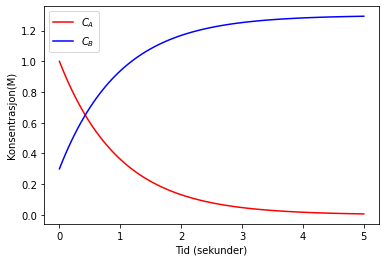

In [18]:
plot(tid,Ca,'r')                         # Plotter for mengde A
plot(tid,Cb,'b')                         # Plotter for mengde B
legend(['$C_A$','$C_B$'])                  # Setter navn på hver linje i plottet

xlabel('Tid (sekunder)')                   # Navn på x-akse
ylabel('Konsentrasjon(M)')                 # Navn på y-akse

### Oppgave 1

a) **Hva skjer for forskjellige verdier av $k$? Prøv med $k = 0.1 s^{-1}$, $1 s^{-1}$, og $100 s^{-1}$. Hvordan endrer plottet seg med de forskjellige hastighetskonstantene?**

b) **Hva skjer når du velger $k = 1 s^{-1}$ og varierer startkonsentrasjonen av $A$? Prøv med $[A] = 0.1 M$, $1 M$ og $10 M$. <font color = "red">NB! Følg med på skalaen på y-aksen.<font>**

## Reversibel reaksjon

I forrige oppgave jobbet dere med en irreversibel reaksjon. Hva skjer når reaksjonen som gjør om A til B er reversibel? Denne reaksjonen skrives som:

$$ A \mathrel{\mathop{\rightleftarrows}^{\mathrm{k_f}}_{\mathrm{k_r}}} B $$ 

Dette er en klassisk likevekt der likevektskonstanten er gitt ved:

$$ K=  \frac{k_f}{k_r} $$

Fra dette utrykket blir det klart at tiden det tar før likevekten innstiller seg ikke avhenger av selve likevektskonstanten $K$, men på størrelsen av $k_f$ og $k_r$.

Når vi setter opp en hastighetslov ser vi alltid på det eller de stoffene som blir brukt opp. I oppgave 1 var det kun $A$ som ble brukt opp, og vi ble sittende igjen med kun:

$$ \frac{d[A]}{dt} = -k[A] $$
 
Det negative fortegnet foran k er der fordi stoffmengden av A minker i løpet av reaksjonen. I dette tilfellet, der reaksjonen mellom A og B er reversibel, trenger vi differensialligninger for både endringen av både A og B:

$$ \frac{d[A]}{dt} = -k_f [A] + k_r [B] $$

$$ \frac{d[B]}{dt} = k_f [A] - k_r [B] $$

### Oppgave 2

**Utvid programmet til plotte endringen i konsentrasjonen til både A og B ved en reversibel reaksjon. Merk at det er kun ``for``-løkken og en variabel vi behøver å endre/legge til.**

<br>
<br>
<br>

Se under for eksempel på kode

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

Text(0, 0.5, 'Konsentrasjon(M)')

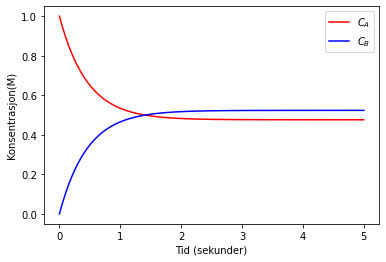

In [4]:
k_f = 1.1
k_r = 1.0            # Hastighetskonstanten
Ca = [1]             # Start konsentrajsonen til mengde A
Cb = [0]             # Start konsentrajsonen til mengde B

for i in range(N-1):                         # Regner numerisk konsentrasjonsendringene over antallet interasjoner
    Ca.append(Ca[i] - k_f*Ca[i]*dt + k_r*Cb[i]*dt)       # Ny konsentrajson for mengde A
    Cb.append(Cb[i] + k_f*Ca[i]*dt - k_r*Cb[i]*dt)       # Ny konsentrajson for mengde B

plot(tid,Ca,'r')                         # Plotter for mengde A
plot(tid,Cb,'b')                         # Plotter for mengde B
legend(['$C_A$','$C_B$'])                  # Setter navn på hver linje i plottet

xlabel('Tid (sekunder)')                   # Navn på x-akse
ylabel('Konsentrasjon(M)')                 # Navn på y-akse

### Oppgave 3

a) **Hva skjer når du prøver forskjellige verdier for $k_f$ og $k_r$? Prøv med verdier mellom $0.1 s^{-1}$ og $10 s^{-1}$. Hvordan endrer plottet seg med de forskjellige hastighetskonstantene.**

b) **Hva skjer når du velger $k = 1 s^{-1}$ og varierer startkonsentrasjonene av $A$ og $B$? Prøv med $[A]$ og $[B]$ mellom $0.1 M$ og $1 M$. <font color = "red">NB! Følg med på skalaen på y-aksen.<font>**

## Flere stoffer

Vi skal nå se på en reaksjon som omfatter flere stoffer som reagerer og som avgir flere produkter. Den irreversible reaksjonen mellom A og B er gitt ved:

$$ A + B \xrightarrow{k} C + D $$

For å beskrive denne reaksjonen trenger vi fire differensialligninger:

$$ \frac{d[A]}{dt} = -k[A][B] $$

$$ \frac{d[B]}{dt} = -k[A][B] $$

$$ \frac{d[C]}{dt} = k[A][B] $$

$$ \frac{d[D]}{dt} = k[A][B] $$

### Oppgave 4

**Utvid koden til å regne ut hvordan konsentrasjonene av $A$, $B$, $C$ og $D$ endrer seg fra 0 til 5 sekunder. Velg $k = 5 M^{-1}s^{-1}$.**

<br>
<br>
<br>

Se under for eksempel på kode

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [ ]:
k = 1.0              # Hastighetskonstanten
Ca = [1]             # Start konsentrajsonen til mengde A
Cb = [1]             # Start konsentrajsonen til mengde B
Cc = [0]             # Start konsentrajsonen til mengde C
Cd = [0]             # Start konsentrajsonen til mengde D

for i in range(N-1):                         # Regner numerisk konsentrasjonsendringene over antallet interasjoner
    Ca.append(Ca[i] - k*Ca[i]*Cb[i]*dt)       # Ny konsentrajson for mengde A
    Cb.append(Cb[i] - k*Ca[i]*Cb[i]*dt)       # Ny konsentrajson for mengde B
    Cc.append(Cc[i] + k*Ca[i]*Cb[i]*dt)       # Ny konsentrajson for mengde C
    Cd.append(Cd[i] + k*Ca[i]*Cb[i]*dt)       # Ny konsentrajson for mengde D

plot(tid,Ca,'r')                         # Plotter for mengde A
plot(tid,Cb,'b')                         # Plotter for mengde B
plot(tid,Cc,'g')                         # Plotter for mengde C
plot(tid,Cd,'m')                         # Plotter for mengde D
legend(['$C_A$','$C_B$', '$C_C$','$C_D$'])                  # Setter navn på hver linje i plottet

xlabel('Tid (sekunder)')                   # Navn på x-akse
ylabel('Konsentrasjon(M)')                 # Navn på y-akse

### Oppgave 5

**Kjør koden over. Hvorfor ser vi kun to linjer?**

### Oppgave 6

a)	**Hva skjer når du prøver forskjellige verdier for $k$? Prøv med verdier mellom $0.1 s^{-1}$ og $10 s^{-1}$. Hvordan endrer plottet seg med de forskjellige hastighetskonstantene.**

b)	**Hva skjer når du velger $k = 5 s^{-1}$ og varierer startkonsentrasjonene av $A$ og $B$? Prøv med $[A] = 1M$ og varier $[B]$ mellom $0.1 M$ og $1 M$. <font color = "red">NB! Følg med på skalaen på y-aksen.<font>**


## Ammoniakk

For å lage ammoniakk reageres nitrogengass og hydrogengass ved høyt trykk og temperatur. Reaksjonen er en likevekt gitt ved reaksjonen:

$$ N_2 (g)+ 3H_2 (g)  \leftrightharpoons 2NH_3 (g) $$   

For å gjøre det lettere å se spranget fra reaksjonsligningen til differensialligningene som beskriver reaksjonen deler vi likevekten inn i to reaksjoner:

$$ N_2 (g) + 3H_2 (g)  \rightarrow 2NH_3 (g) $$   

$$ 2NH_3 (g) \rightarrow N_2 (g) + 3H_2 (g) $$

For å forenkle det hele fortsetter vi å bruke symboler i stedet for å skrive de kjemiske formlene fullt ut. Dette betyr at $N_2 = A$, $H_2 = B$ og $NH_3 = C$, noe som gir:

$$ A + 3B \xrightarrow{k_f}  2C $$ 

$$ 2C \xrightarrow{k_r}  A + 3B $$  

Hvis du synes det er vanskelig å se sammenhengen mellom reaksjonsligningene og differensialligningene så er du ikke alene! Når reaktantene blir mange (og de kan bli flere) og har koeffisienter på begge sider pilen gjelder det å ha tunga rett i munnen. Heldigvis finnes det kode som hjelper oss med slikt (se f. eks.  https://www.sympy.org/scipy-2017-codegen-tutorial/notebooks/32-chemical-kinetics-symbolic-construction.html
om du er nysgjerrig).

En nettside som beskriver mer om differensiallikningene for de som er interessert.

http://vallance.chem.ox.ac.uk/pdfs/KineticsLectureNotes.pdf

Differensialligningene som beskriver endringen i mengden til de forskjellige stoffene i reaksjonen med tiden er gitt ved:

$$ \frac{d[A]}{dt} = -k_f [A] [B]^3 + k_r [C]^2 $$  

$$ \frac{d[B]}{dt} = -k_f 3[A] [B]^3+ k_r 3[C]^2 $$

$$ \frac{d[C]}{dt} = -k_f [A] [B]^3- k_r [C]^2 $$


### Oppgave 7

a) **Forklar hvorfor differensiallikningene vil se slik ut.**

b) **Endre koden til å simulere reaksjonen for ammoniakk**

<br>
<br>
<br>

Se under for eksempel på kode

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

Text(0, 0.5, 'Konsentrasjon(M)')

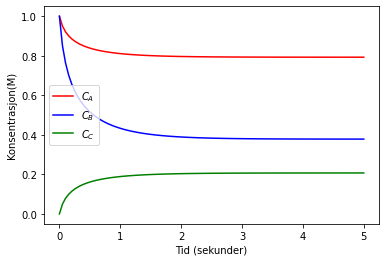

In [9]:
kf = 1.0             # Hastighetskonstanten
kr = 1.0
Ca = [1]             # Start konsentrajsonen til mengde A
Cb = [1]             # Start konsentrajsonen til mengde B
Cc = [0]             # Start konsentrajsonen til mengde C


for i in range(N-1):                                                 # Regner konsentrasjonsendringene
    Ca.append(Ca[i] - kf*Ca[i]*Cb[i]**3 *dt + kr*Cc[i]**2 *dt)       # Ny konsentrajson for mengde A
    Cb.append(Cb[i] - kf*3*Ca[i]*Cb[i]**3 *dt + kr*3*Cc[i]**2 *dt)   # Ny konsentrajson for mengde B
    Cc.append(Cc[i] + kf*Ca[i]*Cb[i]**3 *dt - kr*Cc[i]**2 *dt)       # Ny konsentrajson for mengde C

plot(tid,Ca,'r')                         # Plotter for mengde A
plot(tid,Cb,'b')                         # Plotter for mengde B
plot(tid,Cc,'g')                         # Plotter for mengde C

legend(['$C_A$','$C_B$', '$C_C$'])         # Setter navn på hver linje i plottet

xlabel('Tid (sekunder)')                   # Navn på x-akse
ylabel('Konsentrasjon(M)')                 # Navn på y-akse

### Oppgave 8

**Kjør koden over for initialkonsentrasjonene** 
- $N_2 = 1 M$
- $H_2 = 5 M$
- $kf = 1 M^{-3}s^{-1}$
- $kr = 0.01 M^{-1}s^{-1}$.

### Oppgave 9

a)	**Hva skjer når du bruker de varierer startkonsentrasjonene av $N_2$ og $H_2$? Prøv med $[N2]$ og $[H2]$ mellom $0.1 M$ og $1 M$. <font color = "red">NB! Følg med på skalaen på y-aksen.<font>**
    
b)	**Hva skjer når du prøver forskjellige verdier for $k_f$ og $k_r$? Prøv med verdier mellom 0.1 og 10. Hvordan endrer plottet seg med de forskjellige hastighetskonstantene?**

c)	**Du vil forbedre prosessen og lager en katalysator som senker $k_r$ 100 ganger relativt til $k_f$. Bruk initiale konsentrasjoner** 
- $N_2 = 1 M$
- $H_2 = 5 M$
- $k_f = 1 M^{-3}s^{-1}$
- $k_r = 0.01 M^{-1}s^{-1}$ 

**Får du mer $NH_3$ ut av prosessen? Hvilken parameter vil du endre for å øke mengden $NH_3$ med den nye katalysatoren? Hva var egentlig fordelen med den nye katalysatoren?**

<br>
<br>
<br>
<br>
<br>

Svar: 

Nei, det blir ikke særlig mye mer $NH_3$, du må øke mengden av $N_2$ for å få mer $NH_3$. Etter at du har økt mengden $N_2$, så vil den nye katalysatoren gjøre at du får mer $NH_3$ fordi den «reverse» reaksjonen er veldig treg.


For flere eksempler og likninger se linken vi ga over. 

http://vallance.chem.ox.ac.uk/pdfs/KineticsLectureNotes.pdf

Det er mye tungt stoff der, men er en god kilde til forklaringer og inspirasjon.